<img align="left" src="../img/notebook_banner_siegel.png" style="width:1100px;">

## <b> A modules for geoscientists <b>

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

### <b> Pydap <b>

[Pydap](http://www.pydap.org/) is a pure Python library implementing the Data Access Protocol, also known as DODS or OPeNDAP. You can use Pydap as a client to access hundreds of scientific datasets in a transparent and efficient way through the internet; or as a server to easily distribute your data from a variety of formats.

In [9]:
from pydap.client import open_url

We are going to access [sea ice data](http://icdc.zmaw.de/seaiceconcentration_asi_amsre.html?&L=1) from [CliSAP-Integrated Climate Data Center (ICDC)](http://icdc.zmaw.de/)

In [10]:
dataset = open_url(u"http://icdc.cen.uni-hamburg.de/thredds/dodsC/ssmi_asi_icecon_arc2011")

In [11]:
print(dataset)

<DatasetType with children 'latitude', 'longitude', 'time', 'sea_ice_area_fraction', 'land'>


In [12]:
ice = dataset['sea_ice_area_fraction']

In [13]:
ice.shape

(365, 896, 608)

In [14]:
ice.attributes

{'standard_name': 'sea_ice_area_fraction',
 'long_name': 'sea-ice concentration',
 'units': 'percent',
 'missing_value': 101,
 '_FillValue': 103,
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'coordinates': 'latitude longitude time'}

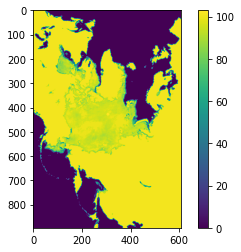

In [15]:
plt.imshow(np.squeeze(ice[0,:,:]))
plt.colorbar()

### <b> F2PY <b>

The [F2PY](http://www.f2py.com/) project is created to unify the efforts of supporting easy connection between Fortran and Python languages. Example below is from [Using Python and FORTRAN with F2py](http://www.f2py.com/). 

Create FORTRAN file (use %%file instead of %%writefile if you on IPython < 1.0):

In [18]:
%%writefile FIB1.F
C FILE: FIB1.F
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE 
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
C END FILE FIB1.F

Overwriting FIB1.F


Compile it with f2py:

In [26]:
!f2py -c -m --fcompiler=gnu95 fib1 FIB1.F

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "fib1" sources
f2py options: []
f2py:> /tmp/tmprtsfvzns/src.linux-x86_64-3.9/fib1module.c
creating /tmp/tmprtsfvzns/src.linux-x86_64-3.9
Reading fortran codes...
	Reading file 'FIB1.F' (format:fix,strict)
Post-processing...
	Block: fib1
			Block: fib
Post-processing (stage 2)...
Building modules...
	Building module "fib1"...
		Constructing wrapper function "fib"...
		  fib(a,[n])
	Wrote C/API module "fib1" to file "/tmp/tmprtsfvzns/src.linux-x86_64-3.9/fib1module.c"
  adding '/tmp/tmprtsfvzns/src.linux-x86_64-3.9/fortranobject.c' to sources.
  adding '/tmp/tmprtsfvzns/src.linux-x86_64-3.9' to include_dirs.
copying /home/sebastian/miniconda3/envs/namibia_dev/lib/python3.9/site-packages/numpy/f2py/src/fortranobject.c -> /tmp/t

Import resulting **fib1.so** as python library:

In [20]:
import fib1

Read some auto generated documentation:

In [24]:
print(fib1.__doc__)
print(fib1.fib.__doc__)

This module 'fib1' is auto-generated with f2py (version:2).
Functions:
  fib(a,n=len(a))
.
fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



Use *fib* function:

In [22]:
import numpy as np

In [23]:
a=np.zeros(15,'d') 
fib1.fib(a) 
a 

array([  0.,   1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.,
        89., 144., 233., 377.])